# Novelty detection with Local Outlier Factor (LOF)
- 로컬 이상값 계수(LOF) 알고리즘은 이웃 데이터 포인트에 대한 특정 데이터 포인트의 로컬 밀도 편차를 계산하는 비지도 이상 징후 탐지 방법

In [1]:
import matplotlib
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
import numpy as np

from sklearn.neighbors import LocalOutlierFactor

In [2]:
np.random.seed(42)

xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))
# 정상(비정상이 아닌) 학습 observation 생성
X = 0.3 * np.random.randn(100, 2)
X_train = np.r_[X + 2, X - 2]
# 새로운 정상(비정상이 아닌) observations 생성
X = 0.3 * np.random.randn(20, 2)
X_test = np.r_[X + 2, X - 2]
# 비정상적인 새로운 observation 결과 생성
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))

# 신규성 감지 모델에 적합
clf = LocalOutlierFactor(n_neighbors=20, novelty=True, contamination=0.1)
clf.fit(X_train)
# 예측, 결정 함수 및 점수 샘플은 잘못된 결과를 제공할 수 있어서,
# X_train에서는 사용하지 말고 X_test, X_outliers 또는 메시 그리드와 같이 보이지 않는 데이터에 사용
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)
n_error_test = y_pred_test[y_pred_test == -1].size
n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size

# 학습된 경계선, 점, 평면에 가장 가까운 벡터를 플롯
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

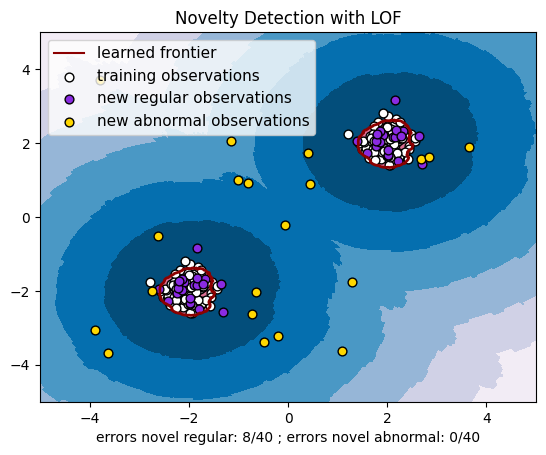

In [3]:
plt.title("Novelty Detection with LOF")
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors="darkred")
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors="palevioletred")

s = 40
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c="white", s=s, edgecolors="k")
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c="blueviolet", s=s, edgecolors="k")
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c="gold", s=s, edgecolors="k")
plt.axis("tight")
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend(
    [mlines.Line2D([], [], color="darkred"), b1, b2, c],
    [
        "learned frontier",
        "training observations",
        "new regular observations",
        "new abnormal observations",
    ],
    loc="upper left",
    prop=matplotlib.font_manager.FontProperties(size=11),
)
plt.xlabel(
    "errors novel regular: %d/40 ; errors novel abnormal: %d/40"
    % (n_error_test, n_error_outliers)
)
plt.show()